In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:

airlines =pd.read_excel("E:\DS Assignments1\\Airlines+Data.xlsx")

In [3]:
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [5]:
airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [6]:
airlines[airlines.duplicated()]

,Month,Passengers


There are no duplicate data.

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Passengers'>

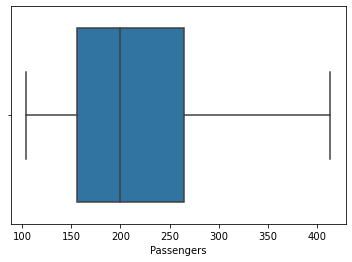

In [7]:
sns.boxplot(airlines['Passengers'])

<AxesSubplot:>

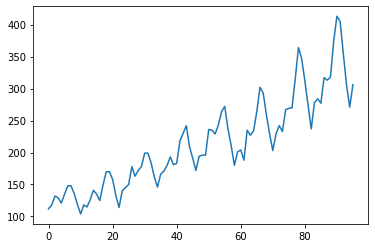

In [8]:
airlines.Passengers.plot()

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


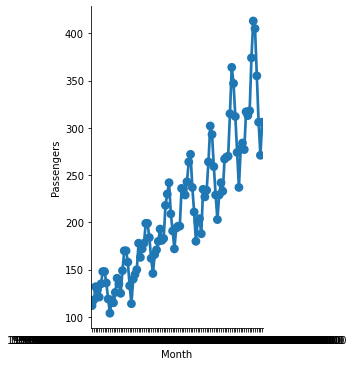

In [9]:
sns.factorplot("Month","Passengers",data=airlines)

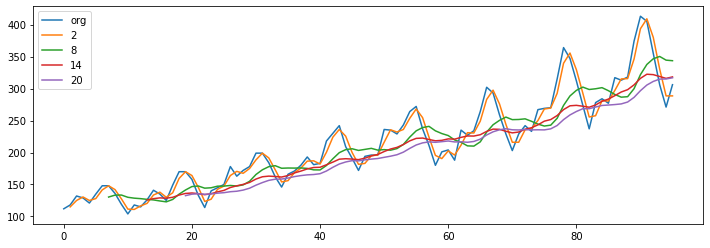

In [10]:
#Data Driven Models
# Moving Average
plt.figure(figsize=(12,4))
airlines.Passengers.plot(label="org")
for i in range(2,24,6):
    airlines["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

<ipython-input-11-0e5af0efa38f>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add = seasonal_decompose(airlines.Passengers,freq=12,model="additive")


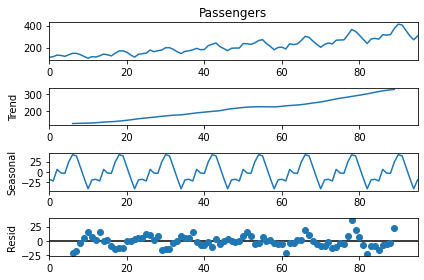

In [11]:
#Time Series decomposition plot
decompose_ts_add = seasonal_decompose(airlines.Passengers,freq=12,model="additive")
decompose_ts_add.plot()
plt.show()


<ipython-input-12-a95db137d5e8>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add = seasonal_decompose(airlines.Passengers,freq=12,model="multiplicative")


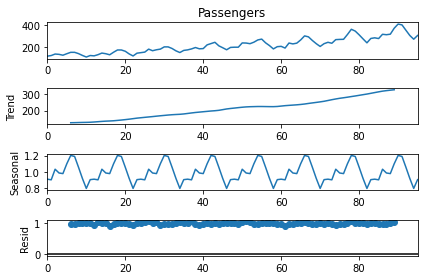

In [12]:
decompose_ts_add = seasonal_decompose(airlines.Passengers,freq=12,model="multiplicative")
decompose_ts_add.plot()
plt.show()

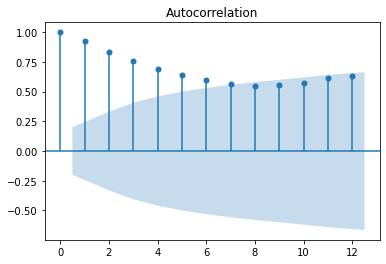

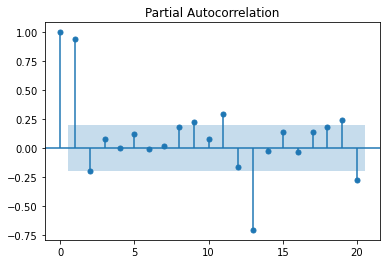

In [13]:
# Auto-Correlation Function and Partial Auto-Correlation Function
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airlines.Passengers,lags=12)
tsa_plots.plot_pacf(airlines.Passengers)
plt.show()

In [14]:
train = airlines.head(70)
test = airlines.tail(26)

In [15]:
# Evaluating Metric MAPE
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [16]:
#SES
ses_model = SimpleExpSmoothing(train["Passengers"]).fit()
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Passengers)

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


22.07625676497336

In [17]:
#HOLT WINTER's MODEL
hw_model = Holt(train["Passengers"]).fit()
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Passengers)

15.418816582800938

In [18]:
#HOLT WINTER's Exponential Smoothing with Additive Seasonality and Additive Trend
hwe_model_add_add = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add,test.Passengers)

10.835530710693254

In [19]:
#HOLT WINTER's Exponential Smoothing with Multiplicative Seasonality and Additive Trend
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Passengers)

9.110053473309376

In [20]:
hwe_model_add_add = ExponentialSmoothing(airlines["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model

In [21]:
hwe_model_add_add.forecast(10)

96     319.234886
97     311.527891
98     350.278075
99     346.984195
100    351.844121
101    403.924848
102    440.565979
103    427.445771
104    376.627413
105    329.766583
dtype: float64

In [22]:
hwe_model_add_add.params

{'smoothing_level': 0.25464081001733696,
 'smoothing_trend': 5.076333030245779e-12,
 'smoothing_seasonal': 0.7453591899688579,
 'damping_trend': nan,
 'initial_level': 175.8909336256514,
 'initial_trend': 2.332731536698785,
 'initial_seasons': array([-66.21994694, -60.62038629, -48.14467371, -53.4164385 ,
        -62.18013298, -48.08122386, -35.86944319, -38.29607542,
        -52.42800166, -71.23188002, -85.67291247, -69.06525993]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

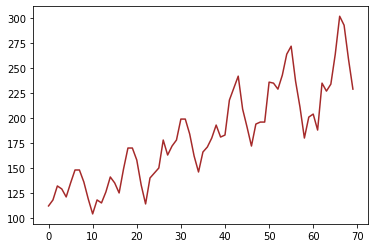

In [23]:
plt.plot(train.index, train["Passengers"], label='Train',color="brown")

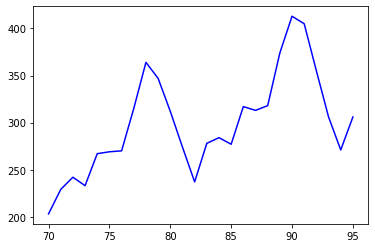

In [24]:
plt.plot(test.index, test["Passengers"], label='Test',color="blue")

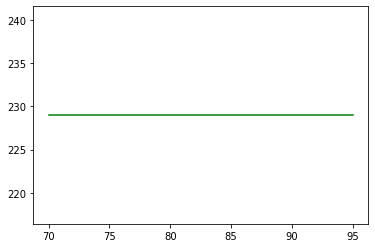

In [25]:
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")

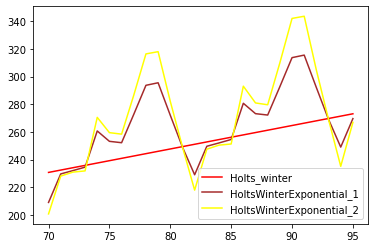

In [26]:
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best')

In [27]:
# Model Based Methods
airlines["Date"] = pd.to_datetime(airlines["Month"],format="%b-%y")
#look for c standard format codes
airlines

,Month,Passengers,Date
0,1995-01-01,112,1995-01-01
1,1995-02-01,118,1995-02-01
2,1995-03-01,132,1995-03-01
3,1995-04-01,129,1995-04-01
4,1995-05-01,121,1995-05-01
...,...,...,...
91,2002-08-01,405,2002-08-01
92,2002-09-01,355,2002-09-01
93,2002-10-01,306,2002-10-01
94,2002-11-01,271,2002-11-01


In [28]:
# Extraction of Month and Year
airlines["month"] = airlines.Date.dt.strftime("%b")
airlines["year"] = airlines.Date.dt.strftime("%Y") 
airlines

,Month,Passengers,Date,month,year
0,1995-01-01,112,1995-01-01,Jan,1995
1,1995-02-01,118,1995-02-01,Feb,1995
2,1995-03-01,132,1995-03-01,Mar,1995
3,1995-04-01,129,1995-04-01,Apr,1995
4,1995-05-01,121,1995-05-01,May,1995
...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002
92,2002-09-01,355,2002-09-01,Sep,2002
93,2002-10-01,306,2002-10-01,Oct,2002
94,2002-11-01,271,2002-11-01,Nov,2002


In [29]:
t= np.arange(1,97)
airlines['t']=t
airlines['t_square']=airlines['t']*airlines['t']

In [30]:
log_Passengers=np.log(airlines['Passengers'])
airlines['log_Passengers']=log_Passengers

In [31]:
airlines = pd.get_dummies(airlines,columns=['month'])
airlines.head(15)

,Month,Passengers,Date,year,t,t_square,log_Passengers,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1995-01-01,112,1995-01-01,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995-02-01,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995-03-01,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995-04-01,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995-05-01,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
5,1995-06-01,135,1995-06-01,1995,6,36,4.905275,0,0,0,0,0,0,1,0,0,0,0,0
6,1995-07-01,148,1995-07-01,1995,7,49,4.997212,0,0,0,0,0,1,0,0,0,0,0,0
7,1995-08-01,148,1995-08-01,1995,8,64,4.997212,0,1,0,0,0,0,0,0,0,0,0,0
8,1995-09-01,136,1995-09-01,1995,9,81,4.912655,0,0,0,0,0,0,0,0,0,0,0,1
9,1995-10-01,119,1995-10-01,1995,10,100,4.779123,0,0,0,0,0,0,0,0,0,0,1,0


In [32]:
# Train and Test Split
train = airlines.head(70)
test = airlines.tail(26)

In [33]:
linear= smf.ols('Passengers~t',data=train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmselin=np.sqrt((np.mean(np.array(test['Passengers'])-np.array(predlin))**2))
rmselin

17.6818799082118

In [34]:
#Qudratic Model
quad=smf.ols('Passengers~t+t_square',data=train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predquad))**2))
rmsequad

43.89814496742655

In [35]:
#Exponential Model
expo=smf.ols('log_Passengers~t',data=train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test['t'])))
predexp
rmseexpo=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(predexp)))**2))
rmseexpo

43.47847070446902

In [36]:
#Additive Seasonality
additive = smf.ols('Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=train).fit()
predadd = pd.Series(additive.predict(test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))
rmseadd = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predadd))**2))
rmseadd

124.97569951828821

In [37]:
#Additive Seasonality with Linear Trend
addlinear = smf.ols('Passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=train).fit()
predaddlinear = pd.Series(addlinear.predict(test[['t','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmseaddlinear=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predaddlinear))**2))
rmseaddlinear

34.50208979427126

In [38]:
#Additive Seasonality with Quadratic Trend
addquad = smf.ols('Passengers~t+t_square+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=train).fit()
predaddquad = pd.Series(addquad.predict(test[['t','t_square','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmseaddquad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predaddquad))**2))
rmseaddquad

30.393042895915094

In [39]:
#Multiplicative Seasonality
mulsea = smf.ols('log_Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=train).fit()
predmul = pd.Series(mulsea.predict(test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmsemul=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predmul))**2))
rmsemul

298.6798189957354

In [40]:
#Multiplicative Seasonality with Linear Trend
mullin = smf.ols('log_Passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=train).fit()
predmullin = pd.Series(mullin.predict(test[['t','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmsemulin=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predmullin))**2))
rmsemulin

298.1366141717154

In [41]:
#Multiplicative Seasonality with Quadratic Trend
mul_quad = smf.ols('Passengers~t+t_square+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=train).fit()
pred_mul_quad = pd.Series(mul_quad.predict(test[['t','t_square','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmse_mul_quad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_mul_quad))**2))
rmse_mul_quad

30.393042895915094

In [42]:
#Comparing all the RMSE Values
data={'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['Values'])

,Model,Values
5,rmselin,17.681880
0,rmse_mul_quad,30.393043
3,rmseaddquad,30.393043
2,rmseaddlinear,34.502090
4,rmseexpo,43.478471
8,rmsequad,43.898145
1,rmseadd,124.975700
7,rmsemulin,298.136614
6,rmsemul,298.679819
